In [11]:
# Main imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [2]:
from utils import clean_and_prepare_data
from utils import get_preprocessing_transformer

In [3]:
data = pd.read_csv("data/WA_Fn-UseC_-Telco-Customer-Churn.csv")
X, y = clean_and_prepare_data(data)

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.2, shuffle=True, random_state=1, stratify=y)

In [6]:
preprocessing = get_preprocessing_transformer()
preprocessing.fit(X_train, y_train)
features = pd.Series(preprocessing.get_feature_names_out())

X_train_transformed = preprocessing.transform(X_train)

In [29]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_train_transformed)

PCA()

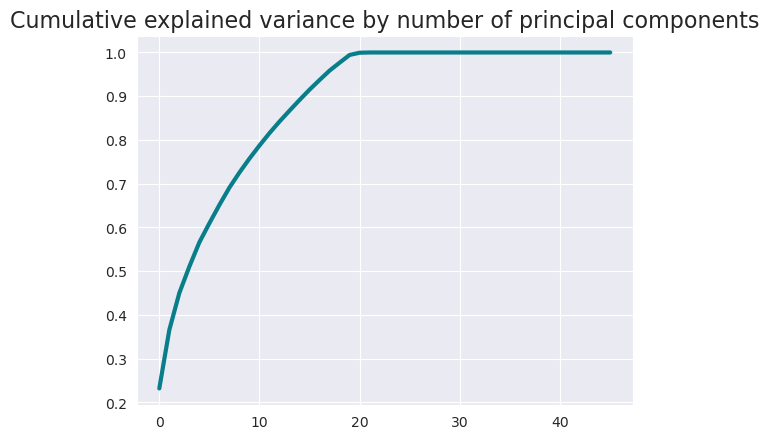

In [9]:
plt.plot(pca.explained_variance_ratio_.cumsum(), lw=3, color='#087E8B')
plt.title('Cumulative explained variance by number of principal components', size=16)
plt.show()

In [33]:
crop_features = [" ".join(str(feature).split("_")[-2:]) for feature in features]

decompositions = pd.DataFrame(
    data=pca.components_.T * np.sqrt(pca.explained_variance_), 
    columns=[f'PC{i}' for i in range(1, len(crop_features) + 1)],
    index=crop_features
)
decompositions.sort_values(by='PC1', ascending=False).iloc[:10, :10]

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
OnlineBackup No internet service,0.397720,-0.036530,-0.080648,-0.008103,0.000408,-0.002211,-0.025277,0.033958,-0.001575,0.002774
OnlineSecurity No internet service,0.397720,-0.036530,-0.080648,-0.008103,0.000408,-0.002211,-0.025277,0.033958,-0.001575,0.002774
InternetService No,0.397720,-0.036530,-0.080648,-0.008103,0.000408,-0.002211,-0.025277,0.033958,-0.001575,0.002774
StreamingMovies No internet service,0.397720,-0.036530,-0.080648,-0.008103,0.000408,-0.002211,-0.025277,0.033958,-0.001575,0.002774
StreamingTV No internet service,0.397720,-0.036530,-0.080648,-0.008103,0.000408,-0.002211,-0.025277,0.033958,-0.001575,0.002774
TechSupport No internet service,0.397720,-0.036530,-0.080648,-0.008103,0.000408,-0.002211,-0.025277,0.033958,-0.001575,0.002774
DeviceProtection No internet service,0.397720,-0.036530,-0.080648,-0.008103,0.000408,-0.002211,-0.025277,0.033958,-0.001575,0.002774
PaperlessBilling No,0.218915,-0.007838,0.177055,0.043403,0.009982,-0.119577,0.370748,0.003233,0.075377,-0.043214
MultipleLines No,0.179852,-0.195595,0.051310,-0.024122,-0.011510,0.145930,0.010704,-0.355054,0.072911,0.098018
PaymentMethod Mailed check,0.162812,-0.088507,0.077681,0.029469,0.000447,0.023013,0.007221,-0.031060,-0.005938,-0.037363


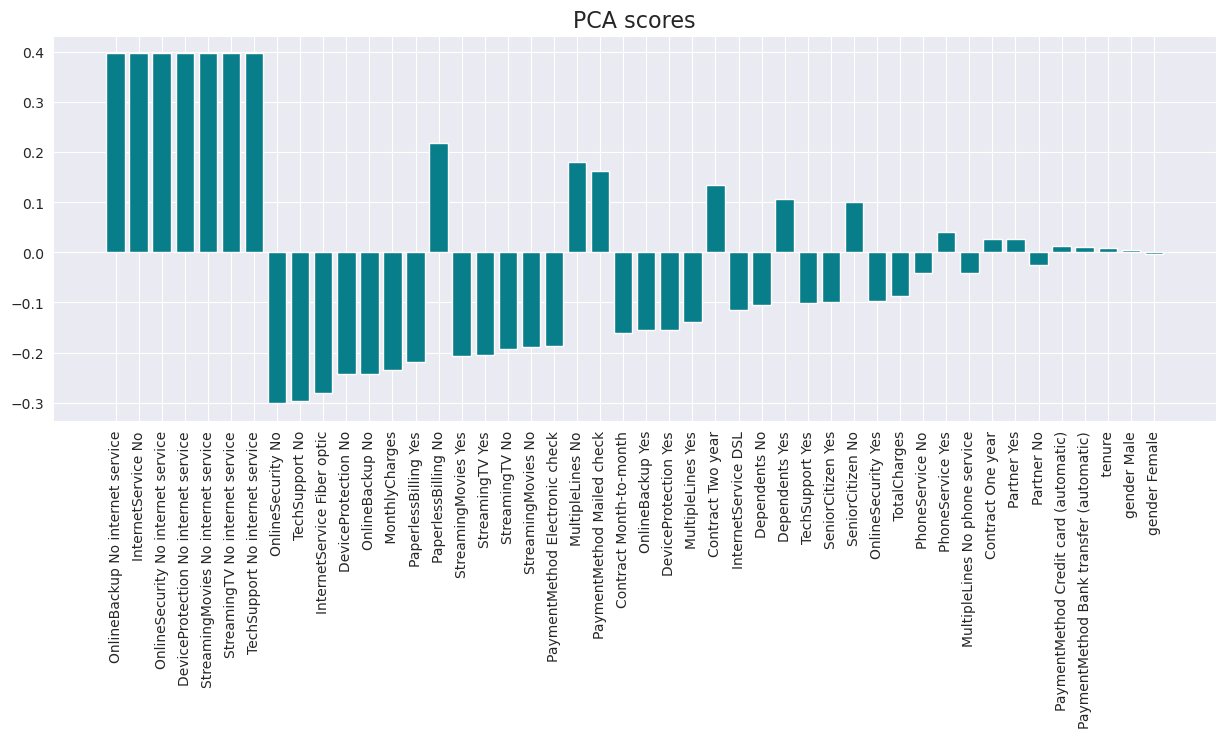

In [35]:
fig, ax = plt.subplots(figsize=(15, 5))
pc1 = decompositions.sort_values(by='PC1', key=abs, ascending=False)[['PC1']]
pc1 = pc1.reset_index()
pc1.columns = ['Feature', 'CorrelationWithPC1']

ax.bar(x=pc1['Feature'], height=pc1['CorrelationWithPC1'], color='#087E8B')
plt.title('PCA scores', size=16)
plt.xticks(rotation='vertical')
plt.show()

After we decomposed the data using PCA method, we may assume, that the most helpfull features here are: OnlineBackup, OnlineSecurity, InternetService, StreamingMovies, StreamingTV.